In [1]:
# This code takes the input of a netCDF file received from the TROPOMI instrument on the
# Sentinel-5 Precursor satellite. My dataset is a subset of the TROPOMI data that focuses
# on the western US during the months of August, September, and October 2019-2022. My dataset 
# consists of multiple atmospheric constituents including NO2, CO, HCHO, O3, and possibly PM10.

In [2]:
# IMPORT PACKAGES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import xarray as xr

In [3]:
# READ FILE INTO XARRAY DATASET
file = '/home/averstyn/final_s5p/20200814_no2.nc'
ds = xr.open_dataset(file)

(25.0, 50.0)

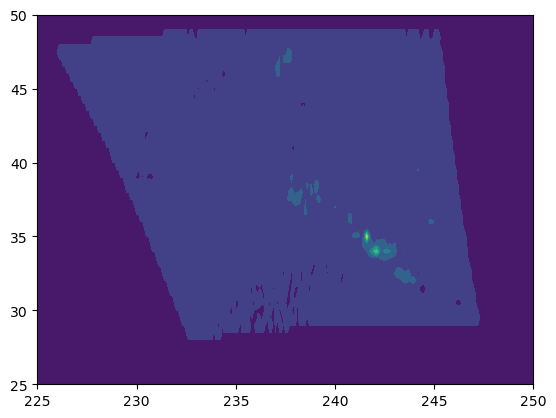

In [4]:
# HW 1 PART A: CREATE CONTOUR PLOT OF DATA
data = ds['nitrogendioxide_tropospheric_column'][0,:,:]
plt.contourf(ds['lon'],ds['lat'],data)
plt.xlim(225,250)
plt.ylim(25,50)

Text(0.5, 1.0, 'Copernicus TROPOMI Nitrogen Dioxide - 20200814')

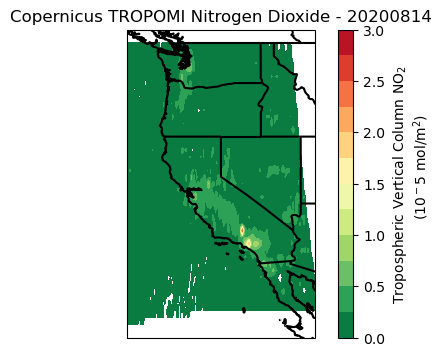

In [5]:
# HW 1 PART B: PLOT DATASET ON A MAP
data = ds['nitrogendioxide_tropospheric_column'][0,:,:] # select no2 data from dataset
data = data*10000 # normalize data values and include 10^-5 in colorbar to indicate normalization
extent = [233,247,27,50]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
vlevs = [0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3] # create colorbar levels
states = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                             facecolor='none') #create state mask
fig = plt.figure(figsize=(6,4))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([233,247,27,50])
ax.add_feature(states,zorder=3,linewidth=1.5)
ax.add_feature(cfeature.BORDERS,zorder=3,linewidth=1.5)
ax.add_feature(cfeature.COASTLINE,zorder=3,linewidth=1.5)
plot1 = ax.contourf(ds['lon'],ds['lat'],data,levels=vlevs,cmap='RdYlGn_r')
plt.colorbar(plot1,label='''Tropospheric Vertical Column NO$_2$
        (10$^-5$ mol/m$^2$)''')
plt.title('Copernicus TROPOMI Nitrogen Dioxide - 20200814')